# Effect of Cultural Background and Family Structure on PISA Test Scores
## by Taichi Nakatani

## Investigation Overview

In this investigation, I wanted to look at the background factors of a student that could be correlated with how they perform on the PISA test. The main focus was on the language spoken at home and the student's family structure. Additionally, I was also interested in seeing how the scores are differentiated by country, specifically between Japan (my nationality) and the United States (where I currently reside).

## Dataset Overview

The data consisted of attributes of approximately 40,000 entries by students from across the globe after removing rows with missing data, as well as removing outlier data that seemed unreliable. Out of 636 available columns, 16 were chosen to focus the scope of the analysis.

Additionally, I wanted to explore a bit more with family structure and test scores. To achieve this I feature engineered a several additional column based on existing columns.

In [7]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [8]:
# load in the dataset into a pandas dataframe
pisa_sub = pd.read_csv('pisa_global.csv')
pisa_usajp = pd.read_csv('pisa_usajp.csv')

## Language Spoken at Home vs Reading Score

Based on the chart show, students who speak a different language at home than the language tested generally have a lower average score compared to those who speak the language of the test at home. Those who speak the language of the test at home generally peak around 500, while those who speak another language is slightly closer to the mid-400s. Surprisingly, the difference in scores was not as drastic as I expected it to be.

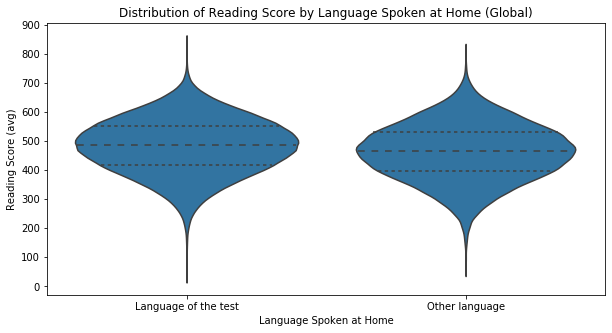

In [20]:
# remove missing variables first
intnl_lang_at_home = pisa_sub[pisa_sub['intl_language_at_home'] != "Missing"]

# create violin plot
base_color = sb.color_palette()[0]
plt.figure(figsize=(10,5))
s = sb.violinplot(data = intnl_lang_at_home, x = 'intl_language_at_home', y = 'read_avg',
              color = base_color, inner='quartile', height=8);
s.set_yticks(np.arange(0,1000,100))
plt.title('Distribution of Reading Score by Language Spoken at Home (Global)');
plt.xlabel('Language Spoken at Home');
plt.ylabel('Reading Score (avg)');

## Family Structure and Scores

The chart shows that the median distribution is higher for students where both parents are at home versus single parent or no parent for math and reading scores.  Additionally, there is a decidedly smaller difference between having both parents at home and a single parent at home than I expected. They both have a high concentration of students who have an average score in the high 500.  On the other hand, compare to the smaller difference between both parent and single parent family structure, having no parent at home significantly lowers the average scores of the student, where the mean is down to approximately 400.

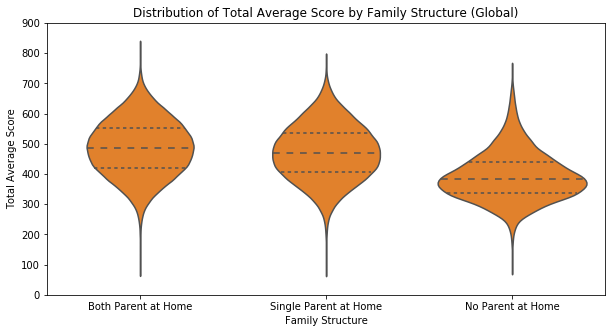

In [19]:
# create violin plot
base_color = sb.color_palette()[1]
plt.figure(figsize=(10,5))

variables = ['Both Parent at Home', 'Single Parent at Home', 'No Parent at Home'];

v = sb.violinplot(data = intnl_lang_at_home, x = 'parents_at_home', y = 'score_avg',
              color = base_color, order = variables, inner = 'quartile', height=8);
v.set_yticks(np.arange(0,1000,100))
plt.title('Distribution of Total Average Score by Family Structure (Global)');
plt.xlabel('Family Structure');
plt.ylabel('Total Average Score');

## Distribution of Scores by Country

Comparing the distribution of scores between Japan and USA, Japan has a higher averages score for both Math and Reading compared to the United States. This difference is the most pronounced in Math, where Japan surpasses the United States by around 50 points.  On the other hand, United States has a higher average of Science scores which was somewhat surprising to see.  Judging by the plot, United States surpasses Japan by around 50 points in regards to Science scores.

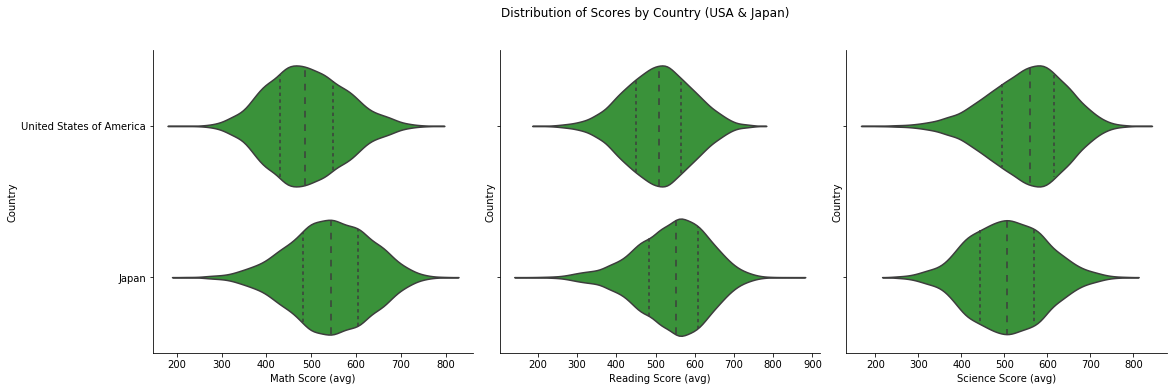

In [37]:
### use a pairplot function to comopare scores by country
base_color = sb.color_palette()[2]
g = sb.PairGrid(data = pisa_usajp, x_vars = ['math_avg','read_avg','scie_avg'],
                y_vars = 'country', height=5);
g.map(sb.violinplot, inner = 'quartile', color=base_color);
g.set(ylabel= 'Country')
g.fig.suptitle("Distribution of Scores by Country (USA & Japan)", y=1.08);

# replace label names
replacements = {'math_avg': 'Math Score (avg)', 'read_avg': 'Reading Score (avg)',
                'scie_avg': 'Science Score (avg)', 'country': 'Country'}

for i in range(1):
    for j in range(3):
        xlabel = g.axes[i][j].get_xlabel()
        ylabel = g.axes[i][j].get_ylabel()
        if xlabel in replacements.keys():
            g.axes[i][j].set_xlabel(replacements[xlabel])
        if ylabel in replacements.keys():
            g.axes[i][j].set_ylabel(replacements[ylabel])

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!